# <p style="text-align: center;">Multi-Layer Perceptron (MLP) example in Keras <br> for house sales price prediction
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

## Table of Contents

1. Get the data
2. Read in the data
3. Get an overview of the data
4. Accessing individual data columns in Pandas
5. Plotting data
6. Dealing with "NaN" (missing) entries
7. Preparing the input data for the MLP (selecting columns)
8. Preparing MLP training matrices with normalized values
9. Building and training a MLP in Keras
10. Testing the trained MLP
11. Predicting house prices for the Kaggle competition

## Introduction

In this Jupyter notebook we will see how to use Keras to implement a Multi-Layer Perceptron. The MLP will be able to predict house sale prices just on some features of these houses! The data stems from the Kaggle<br>
<p style="text-align: center;">
__["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__
</p><br>
competetion and consists of the following data:
- a training table: 1460 rows of 81 house features, where the last feature is the actual house sale price
- a test table: 1459 rows of 80 house features

For taking part in the competition, one has to predict for each of the 1459 houses in the test table the missing house price (feature #81) and submit a `my_submission.csv` file of the following form

*house-id ,  predicted-sale-price*<br>
*house-id ,  predicted-sale-price*<br>
*...*<br>
*house-id ,  predicted-sale-price*<br>




## 1. Get the data

For getting the data go to
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
and press "download all". Then unzip the file to a folder `kaggle_dataset_house_prices`

There should be the following files in this folder:
- `data_description.txt`
- `sample_submission.csv`
- `test.csv`
- `train.csv`

## 2. Read in the data

We now will read in the data in Python using Pandas, an

*"open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."*

Quote is from __[Pandas' webpage](https://pandas.pydata.org/)__

Further, we will show the data type of the training and test data read in and show its shape.

In [2]:
import pandas as pd
print("Your Pandas version is", pd.__version__)
train_data = pd.read_csv("kaggle_dataset_house_prices/train.csv")
test_data  = pd.read_csv("kaggle_dataset_house_prices/test.csv")
print("Type of train_data is ", type(train_data))
print("Type of test_data is ", type(test_data))
print("Shape of train_data is", train_data.shape)
print("Shape of test_data is", test_data.shape)

Your Pandas version is 0.20.3
Type of train_data is  <class 'pandas.core.frame.DataFrame'>
Type of test_data is  <class 'pandas.core.frame.DataFrame'>
Shape of train_data is (1460, 81)
Shape of test_data is (1459, 80)


The first dimension of the shape is the number of rows. It corresponds to the number of houses that are stored in the Pandas DataFrame (table).

The second dimension of the shape is the number of columns. It corresponds to the number of features that are stored per house.

## 3. Get an overview of the data

It is important to know how the raw data looks like which we are going to use in the following. Let's try to print the data directly:

In [3]:
print(train_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

Note, that there are some entries "NaN", which means "Not a Number" or "missing". We will have to remember this issue and deal with the missing data later!

However, this does not give us a good overview!

For this, let us retrieve the column names in the training data table directly and print them:

In [4]:
column_names = train_data.columns.values
print("Type of column_names is", type(train_data.columns.values))
i=0
for column_name in column_names:
    print(i, ":", column_name)
    i+=1

Type of column_names is <class 'numpy.ndarray'>
0 : Id
1 : MSSubClass
2 : MSZoning
3 : LotFrontage
4 : LotArea
5 : Street
6 : Alley
7 : LotShape
8 : LandContour
9 : Utilities
10 : LotConfig
11 : LandSlope
12 : Neighborhood
13 : Condition1
14 : Condition2
15 : BldgType
16 : HouseStyle
17 : OverallQual
18 : OverallCond
19 : YearBuilt
20 : YearRemodAdd
21 : RoofStyle
22 : RoofMatl
23 : Exterior1st
24 : Exterior2nd
25 : MasVnrType
26 : MasVnrArea
27 : ExterQual
28 : ExterCond
29 : Foundation
30 : BsmtQual
31 : BsmtCond
32 : BsmtExposure
33 : BsmtFinType1
34 : BsmtFinSF1
35 : BsmtFinType2
36 : BsmtFinSF2
37 : BsmtUnfSF
38 : TotalBsmtSF
39 : Heating
40 : HeatingQC
41 : CentralAir
42 : Electrical
43 : 1stFlrSF
44 : 2ndFlrSF
45 : LowQualFinSF
46 : GrLivArea
47 : BsmtFullBath
48 : BsmtHalfBath
49 : FullBath
50 : HalfBath
51 : BedroomAbvGr
52 : KitchenAbvGr
53 : KitchenQual
54 : TotRmsAbvGrd
55 : Functional
56 : Fireplaces
57 : FireplaceQu
58 : GarageType
59 : GarageYrBlt
60 : GarageFinish
61 : 

## 4. Accessing individual data columns in Pandas

Let's say, we want to plot the sale price as a function of the year in which the house was built, since we assume, that newer houses will be sold for higher prices.

For this, we have to access individual columns:

In [5]:
yearbuilt_column = train_data["YearBuilt"].values
saleprice_column = train_data["SalePrice"].values
print("Type of yearbuilt_column is", type(yearbuilt_column))
for row_nr in range(0,10):
    print("YearBuilt: ", yearbuilt_column[row_nr],
          "--> SalePrice: ", saleprice_column[row_nr])

Type of yearbuilt_column is <class 'numpy.ndarray'>
YearBuilt:  2003 --> SalePrice:  208500
YearBuilt:  1976 --> SalePrice:  181500
YearBuilt:  2001 --> SalePrice:  223500
YearBuilt:  1915 --> SalePrice:  140000
YearBuilt:  2000 --> SalePrice:  250000
YearBuilt:  1993 --> SalePrice:  143000
YearBuilt:  2004 --> SalePrice:  307000
YearBuilt:  1973 --> SalePrice:  200000
YearBuilt:  1931 --> SalePrice:  129900
YearBuilt:  1939 --> SalePrice:  118000


## 5. Plotting data

Let's plot the sale price as a function of the year built to better "see" whether there is a relationship between these two features!

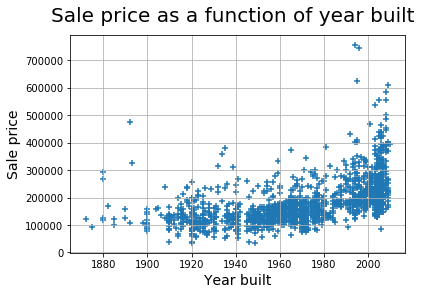

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure("SalePrice analysis")
fig.suptitle("Sale price as a function of year built", fontsize=20)
plt.scatter(yearbuilt_column, saleprice_column, marker="+")
plt.grid(True)
plt.xlabel("Year built", fontsize=14)
plt.ylabel("Sale price", fontsize=14)
plt.show()

It seems that there is no clear linear relationship between the year built and the sale price. We can compute the Pearson correlation coefficient in order to check this:

In [7]:
from scipy.stats.stats import pearsonr

print("Pearson correlation coefficient of year built and sale price vectors is",
      pearsonr(yearbuilt_column, saleprice_column)[0])

Pearson correlation coefficient of year built and sale price vectors is 0.5228973328794969


0.522897332879 is not really a large linear correlation. However, note that there might be a NON-linear relationship between these two features that cannot be measured by the Pearson correlation coefficient.

## 6. Dealing with "NaN" (missing) entries

We have seen above that there are sometimes missing values. Why?

E.g. for many houses the "Fence" feature makes no sense, if there is no fence!

    Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo  	Good Wood
       MnWw 	Minimum Wood/Wire
       NA   	No Fence
       
For the sake of simplicity, let us replace all NaN values in both the training and testing data with zeros.

In [8]:
print("Fence column before NaN replacement:\n", train_data["Fence"])
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)
print("Fence column after NaN replacement:\n", train_data["Fence"])

Fence column before NaN replacement:
 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5       MnPrv
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14       GdWo
15      GdPrv
16        NaN
17        NaN
18        NaN
19      MnPrv
20        NaN
21      GdPrv
22        NaN
23        NaN
24      MnPrv
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1430      NaN
1431      NaN
1432      NaN
1433      NaN
1434      NaN
1435    GdPrv
1436     GdWo
1437      NaN
1438    MnPrv
1439      NaN
1440      NaN
1441      NaN
1442      NaN
1443      NaN
1444      NaN
1445      NaN
1446      NaN
1447      NaN
1448     GdWo
1449      NaN
1450      NaN
1451      NaN
1452      NaN
1453      NaN
1454      NaN
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object
Fence column after NaN replacement:
 0           0
1           0
2 

## 7. Preparing the input data for the MLP (selecting columns)

We have seen before, that there are some columns in the table(s) that store numeric values and other categorial values. How can we check this using Pandas?

In [9]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Let us start simple: we will use only numeric values in the following. For this, let us prepare tables, that exclude "object" columns:

In [10]:
train_data = train_data.select_dtypes(exclude=['object'])
test_data = test_data.select_dtypes(exclude=['object'])
print("Shape of train_data is now", train_data.shape)
print("Shape of test_data is now", test_data.shape)

Shape of train_data is now (1460, 38)
Shape of test_data is now (1459, 37)


Ok, that is what we expected! There are fewer columns (fewer features) available, but the number of houses is still the same.

Let us now print the list of "remaining" features:

In [11]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


## 8. Preparing MLP training matrices with normalized values

The numerical values in our training matrix "live" in different ranges. This often makes problems for MLPs, since some values can be very small (e.g. from [0,0.1]) and some can be very large (e.g. from [10000,100000]).

### a) Plotting data ranges by the help of histograms

Let us first get an impression how different the values are!

Type of feature1 is <class 'numpy.ndarray'>
[ 856 1262  920 ... 1188 1078 1256]
Type of feature2 is <class 'numpy.ndarray'>
[208500 181500 223500 ... 266500 142125 147500]


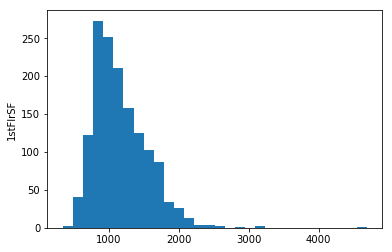

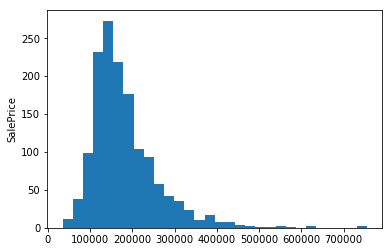

In [12]:
feature1 = train_data["1stFlrSF"].values
print("Type of feature1 is", type(feature1))
print(feature1)

feature2 = train_data["SalePrice"].values
print("Type of feature2 is", type(feature2))
print(feature2)

plt.hist(feature1, bins=30)
plt.ylabel('1stFlrSF')
plt.show()

plt.hist(feature2, bins=30)
plt.ylabel('SalePrice')
plt.show()



So "1stFlrSF" has values somewhere between ca. 500 and 4.500, while "SalePrice" has values between ca. 50.000 and 750.000.

### b) Using scikit-learn's MinMaxScaler to scale input features and output values

For this, let us normalize the values of the training matrix, such that all values within a feature column are normalized to the range [0,1]. We can realize such a normalization using the MinMaxScaler of scikit-learn:

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. define how NumPy shall print matrices
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) # do not use scientific "e"-notation

# 2. convert Pandas DataFrame to NumPy matrices
#    since Keras will expect NumPy matrices
train_input_matrix = train_data.values[:,1:37]
train_output_matrix = train_data.values[:,37]
train_output_matrix = train_output_matrix.reshape(-1,1)
test_input_matrix  = test_data.values[:,1:]
print("Shape of Pandas DataFrame train_data is", train_data.shape)
print("Type of train_input_matrix is", type(train_input_matrix))
print("Shape of train_input_matrix is", train_input_matrix.shape)
print("Shape of train_output_matrix is", train_output_matrix.shape)
print("Shape of test_input_matrix is", test_input_matrix.shape)

# 3. create a MinMaxScaler with feature range [0,1]
#    and use it to normalize the train_input_matrix
#    Then use the SAME normalization to normalize test_data_matrix
scaler_input_features = MinMaxScaler(feature_range=(0, 1))
normalized_train_input_matrix = scaler_input_features.fit_transform(train_input_matrix)
normalized_test_input_matrix = scaler_input_features.transform(test_input_matrix)

# 4. show train data matrix before and after normalization
print("\ntrain_input_matrix:\n", train_input_matrix)
print("\nnormalized_train_input_matrix:\n", normalized_train_input_matrix)

# 5. show test data matrix before and after normalization
print("\ntest_input_matrix:\n", test_input_matrix)
print("\nnormalized_test_input_matrix:\n", normalized_test_input_matrix)

# 6. also create a MinMaxScaler for the train_output_matrix,
#    which is essentially a column with the final SalePrice
scaler_saleprice = MinMaxScaler(feature_range=(0, 1))
normalized_train_output_matrix = scaler_saleprice.fit_transform(train_output_matrix)
print("\ntrain_output_matrix:\n", train_output_matrix)
print("\nnormalized_train_output_matrix:\n", normalized_train_output_matrix)


Shape of Pandas DataFrame train_data is (1460, 38)
Type of train_input_matrix is <class 'numpy.ndarray'>
Shape of train_input_matrix is (1460, 36)
Shape of train_output_matrix is (1460, 1)
Shape of test_input_matrix is (1459, 36)

train_input_matrix:
 [[   60.    65.  8450. ...     0.     2.  2008.]
 [   20.    80.  9600. ...     0.     5.  2007.]
 [   60.    68. 11250. ...     0.     9.  2008.]
 ...
 [   70.    66.  9042. ...  2500.     5.  2010.]
 [   20.    68.  9717. ...     0.     4.  2010.]
 [   20.    75.  9937. ...     0.     6.  2008.]]

normalized_train_input_matrix:
 [[0.2353 0.2077 0.0334 ... 0.     0.0909 0.5   ]
 [0.     0.2556 0.0388 ... 0.     0.3636 0.25  ]
 [0.2353 0.2173 0.0465 ... 0.     0.7273 0.5   ]
 ...
 [0.2941 0.2109 0.0362 ... 0.1613 0.3636 1.    ]
 [0.     0.2173 0.0393 ... 0.     0.2727 1.    ]
 [0.     0.2396 0.0404 ... 0.     0.4545 0.5   ]]

test_input_matrix:
 [[   20.    80. 11622. ...     0.     6.  2010.]
 [   20.    81. 14267. ... 12500.     6.  201

### c) Replotting some data columns as histograms after normalization

Do you wonder how the plots look like after normalization?

[60. 20. 60. ... 70. 20. 20.]


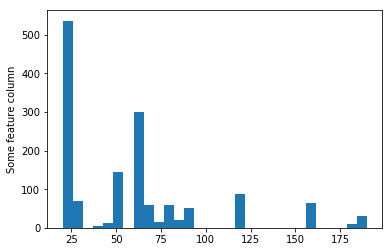

[0.2353 0.     0.2353 ... 0.2941 0.     0.    ]


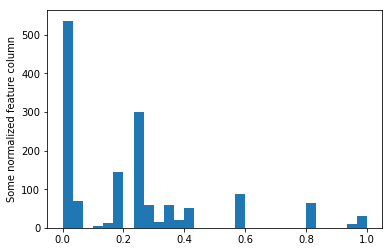

In [15]:
a_feature_column = train_input_matrix[:,0]
print(a_feature_column)
plt.hist(a_feature_column, bins=30)
plt.ylabel('Some feature column')
plt.show()

a_feature_column_normalized = normalized_train_input_matrix[:,0]
print(a_feature_column_normalized)
plt.hist(a_feature_column_normalized, bins=30)
plt.ylabel('Some normalized feature column')
plt.show()

Of course, the form of the histogram has not changed. It's only the range of the data that has changed!

## 9. Building and training a MLP in Keras

Now let us build a simple MLP in Keras and train it using the normalized data matrices we have just prepared.

In [95]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout
import pandas as pd
import numpy as np

model = Sequential()
model.add(Dense(160, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer='sgd')

X = normalized_train_input_matrix
Y = normalized_train_output_matrix
model.fit(X,Y, validation_split=0.10, epochs=1000)

Epoch 1/1000
1460/1460 [==============================] - 1s 393us/step - loss: 0.0165
Epoch 2/1000
1460/1460 [==============================] - 0s 47us/step - loss: 0.0098
Epoch 3/1000
1460/1460 [==============================] - 0s 50us/step - loss: 0.0084
Epoch 4/1000
1460/1460 [==============================] - 0s 48us/step - loss: 0.0074
Epoch 5/1000
1460/1460 [==============================] - 0s 48us/step - loss: 0.0067
Epoch 6/1000
1460/1460 [==============================] - 0s 45us/step - loss: 0.0062
Epoch 7/1000
1460/1460 [==============================] - 0s 50us/step - loss: 0.0059
Epoch 8/1000
1460/1460 [==============================] - 0s 47us/step - loss: 0.0055
Epoch 9/1000
1460/1460 [==============================] - 0s 52us/step - loss: 0.0053
Epoch 10/1000
1460/1460 [==============================] - 0s 47us/step - loss: 0.0050
Epoch 11/1000
1460/1460 [==============================] - 0s 48us/step - loss: 0.0048
Epoch 12/1000
1460/1460 [==========================

Epoch 95/1000
1460/1460 [==============================] - 0s 56us/step - loss: 0.0023
Epoch 96/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0023
Epoch 97/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0023
Epoch 98/1000
1460/1460 [==============================] - 0s 38us/step - loss: 0.0023
Epoch 99/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0023
Epoch 100/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0023
Epoch 101/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0023
Epoch 102/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0023
Epoch 103/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0023
Epoch 104/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0023
Epoch 105/1000
1460/1460 [==============================] - 0s 67us/step - loss: 0.0023
Epoch 106/1000
1460/1460 [===========

1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 189/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0019
Epoch 190/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 191/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 192/1000
1460/1460 [==============================] - 0s 34us/step - loss: 0.0019
Epoch 193/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 194/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0019
Epoch 195/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0019
Epoch 196/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 197/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 198/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0019
Epoch 199/1000
1460/1460 [=====================

1460/1460 [==============================] - 0s 55us/step - loss: 0.0017
Epoch 282/1000
1460/1460 [==============================] - 0s 40us/step - loss: 0.0017
Epoch 283/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 284/1000
1460/1460 [==============================] - 0s 44us/step - loss: 0.0017
Epoch 285/1000
1460/1460 [==============================] - 0s 43us/step - loss: 0.0017
Epoch 286/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 287/1000
1460/1460 [==============================] - 0s 38us/step - loss: 0.0017
Epoch 288/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 289/1000
1460/1460 [==============================] - 0s 34us/step - loss: 0.0017
Epoch 290/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0017
Epoch 291/1000
1460/1460 [==============================] - 0s 70us/step - loss: 0.0017
Epoch 292/1000
1460/1460 [=====================

Epoch 374/1000
1460/1460 [==============================] - 0s 45us/step - loss: 0.0016
Epoch 375/1000
1460/1460 [==============================] - 0s 42us/step - loss: 0.0016
Epoch 376/1000
1460/1460 [==============================] - 0s 92us/step - loss: 0.0016
Epoch 377/1000
1460/1460 [==============================] - 0s 52us/step - loss: 0.0016
Epoch 378/1000
1460/1460 [==============================] - 0s 41us/step - loss: 0.0016
Epoch 379/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 380/1000
1460/1460 [==============================] - 0s 42us/step - loss: 0.0016
Epoch 381/1000
1460/1460 [==============================] - 0s 70us/step - loss: 0.0016
Epoch 382/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0016
Epoch 383/1000
1460/1460 [==============================] - 0s 71us/step - loss: 0.0016
Epoch 384/1000
1460/1460 [==============================] - 0s 56us/step - loss: 0.0016
Epoch 385/1000
1460/1460 [======

1460/1460 [==============================] - 0s 60us/step - loss: 0.0015
Epoch 468/1000
1460/1460 [==============================] - 0s 97us/step - loss: 0.0015
Epoch 469/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0015
Epoch 470/1000
1460/1460 [==============================] - 0s 102us/step - loss: 0.0015
Epoch 471/1000
1460/1460 [==============================] - 0s 38us/step - loss: 0.0015
Epoch 472/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 473/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 474/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 475/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 476/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 477/1000
1460/1460 [==============================] - 0s 70us/step - loss: 0.0015
Epoch 478/1000
1460/1460 [====================

1460/1460 [==============================] - 0s 36us/step - loss: 0.0015
Epoch 561/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0015
Epoch 562/1000
1460/1460 [==============================] - 0s 34us/step - loss: 0.0015
Epoch 563/1000
1460/1460 [==============================] - 0s 43us/step - loss: 0.0015
Epoch 564/1000
1460/1460 [==============================] - 0s 45us/step - loss: 0.0015
Epoch 565/1000
1460/1460 [==============================] - 0s 41us/step - loss: 0.0015
Epoch 566/1000
1460/1460 [==============================] - 0s 41us/step - loss: 0.0015
Epoch 567/1000
1460/1460 [==============================] - 0s 43us/step - loss: 0.0015
Epoch 568/1000
1460/1460 [==============================] - 0s 42us/step - loss: 0.0015
Epoch 569/1000
1460/1460 [==============================] - 0s 45us/step - loss: 0.0015
Epoch 570/1000
1460/1460 [==============================] - 0s 51us/step - loss: 0.0015
Epoch 571/1000
1460/1460 [=====================

1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 654/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 655/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 656/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 657/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 658/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 659/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 660/1000
1460/1460 [==============================] - 0s 86us/step - loss: 0.0014
Epoch 661/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0014
Epoch 662/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0014
Epoch 663/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0014
Epoch 664/1000
1460/1460 [=====================

1460/1460 [==============================] - 0s 42us/step - loss: 0.0013
Epoch 746/1000
1460/1460 [==============================] - 0s 70us/step - loss: 0.0013
Epoch 747/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 748/1000
1460/1460 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 749/1000
1460/1460 [==============================] - 0s 121us/step - loss: 0.0013
Epoch 750/1000
1460/1460 [==============================] - 0s 41us/step - loss: 0.0013
Epoch 751/1000
1460/1460 [==============================] - 0s 49us/step - loss: 0.0013
Epoch 752/1000
1460/1460 [==============================] - 0s 54us/step - loss: 0.0013
Epoch 753/1000
1460/1460 [==============================] - 0s 53us/step - loss: 0.0013
Epoch 754/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 755/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 756/1000
1460/1460 [====================

1460/1460 [==============================] - 0s 34us/step - loss: 0.0013
Epoch 839/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 840/1000
1460/1460 [==============================] - 0s 40us/step - loss: 0.0013
Epoch 841/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 842/1000
1460/1460 [==============================] - 0s 36us/step - loss: 0.0013
Epoch 843/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 844/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0013
Epoch 845/1000
1460/1460 [==============================] - 0s 38us/step - loss: 0.0013
Epoch 846/1000
1460/1460 [==============================] - 0s 35us/step - loss: 0.0013
Epoch 847/1000
1460/1460 [==============================] - 0s 37us/step - loss: 0.0013
Epoch 848/1000
1460/1460 [==============================] - 0s 45us/step - loss: 0.0013
Epoch 849/1000
1460/1460 [=====================

1460/1460 [==============================] - 0s 61us/step - loss: 0.0012
Epoch 932/1000
1460/1460 [==============================] - 0s 40us/step - loss: 0.0012
Epoch 933/1000
1460/1460 [==============================] - 0s 39us/step - loss: 0.0012
Epoch 934/1000
1460/1460 [==============================] - 0s 41us/step - loss: 0.0012
Epoch 935/1000
1460/1460 [==============================] - 0s 40us/step - loss: 0.0012
Epoch 936/1000
1460/1460 [==============================] - 0s 59us/step - loss: 0.0012
Epoch 937/1000
1460/1460 [==============================] - 0s 58us/step - loss: 0.0012
Epoch 938/1000
1460/1460 [==============================] - 0s 41us/step - loss: 0.0012
Epoch 939/1000
1460/1460 [==============================] - 0s 58us/step - loss: 0.0012
Epoch 940/1000
1460/1460 [==============================] - 0s 55us/step - loss: 0.0012
Epoch 941/1000
1460/1460 [==============================] - 0s 39us/step - loss: 0.0012
Epoch 942/1000
1460/1460 [=====================

## 10. Testing the trained MLP

Normally we test a model on a separate test data set. However, in this case, there is no test dataset, since the test data only contains the input features, but not the final sale prices of the houses.

For this, let us see how good the trained model can predict the sale prices of the houses from the training dataset.

preds_train_houses:
 [[0.2603]
 [0.2066]
 [0.2548]
 ...
 [0.277 ]
 [0.1424]
 [0.1718]]
preds_train_houses_dollar:
 [[222341.42]
 [183651.98]
 [218346.08]
 ...
 [234376.48]
 [137409.19]
 [158598.56]]
Shape of preds_train_houses is (1460, 1)
Shape of preds_train_houses_dollar is (1460, 1)


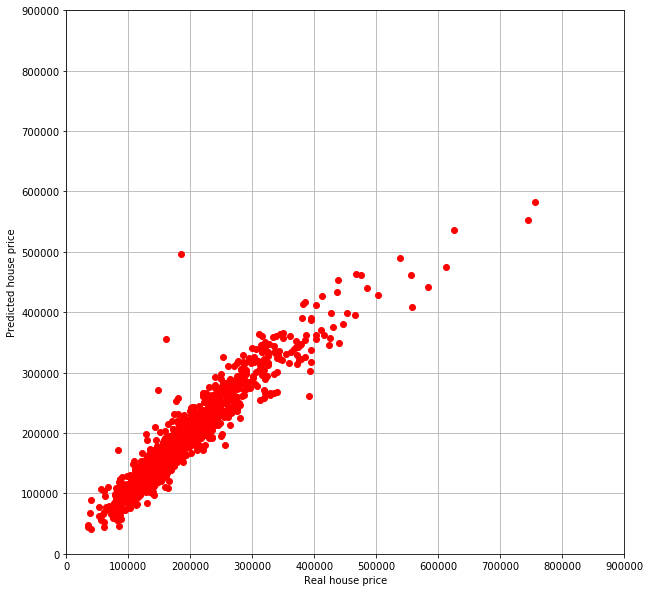

In [96]:
preds_train_houses = model.predict(normalized_train_input_matrix)
print("preds_train_houses:\n", preds_train_houses)
preds_train_houses_dollar = scaler_saleprice.inverse_transform(preds_train_houses)
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("Shape of preds_train_houses is", preds_train_houses.shape)
print("Shape of preds_train_houses_dollar is", preds_train_houses_dollar.shape)
plt.figure( figsize=(10,10) )
plt.plot(train_output_matrix, preds_train_houses_dollar, 'ro')
plt.xlabel('Real house price', fontsize = 10)
plt.ylabel('Predicted house price', fontsize = 10)
plt.grid(True)
plt.xlim(0,900000)
plt.ylim(0,900000)
plt.show()

The plot gives us already a good overview of how good the model is able to "reproduce" the sale prices of the houses from the training dataset. In the ideal case we would see here... what? Think about it! Yes, the identity function. If the real house price is x Dollar, the predicted house price should be x Dollar as well, or?

However, the goal of the training of the model is not to "reproduce" the sale prices as good as possible! The actual goal is that the model captures the underlying relationships between the house features and the sale price. For this, "generalization" too new data is much more important than "reproducing" the training data. That's an important point to understand!

Since we used all the data for training, no ground truth data remains for testing. However, let us compute the average error in Dollar we make, when we predict the prices of houses stemming from the training data:

In [97]:
print("preds_train_houses_dollar:\n", preds_train_houses_dollar)
print("train_output_matrix:\n", train_output_matrix)
absdiff = np.abs(preds_train_houses_dollar - train_output_matrix)
print(absdiff)
average_error_in_dollar = np.mean(absdiff)
print("The final trained model made an average error of $%.2f" % average_error_in_dollar,
      "when predicting the house prices on the training data!")

preds_train_houses_dollar:
 [[222341.42]
 [183651.98]
 [218346.08]
 ...
 [234376.48]
 [137409.19]
 [158598.56]]
train_output_matrix:
 [[208500.]
 [181500.]
 [223500.]
 ...
 [266500.]
 [142125.]
 [147500.]]
[[13841.4219]
 [ 2151.9844]
 [ 5153.9219]
 ...
 [32123.5156]
 [ 4715.8125]
 [11098.5625]]
The final trained model made an average error of $15949.22 when predicting the house prices on the training data!


## 11. Predicting house prices for the Kaggle competition

Now we will use the trained MLP to predict the prices of the houses for which only the features are given, but not the sale price!

In [98]:
# PREDICT house prices for all the test houses!
preds_test_houses = model.predict(normalized_test_input_matrix)
preds_test_houses_dollar = scaler_saleprice.inverse_transform(preds_test_houses)


# generate a Pandas dataframe
# from the NumPy prediction_matrix
test_house_ids = test_data.values[:,0] # get the IDs from the original Pandas DataFrame
preds_test_houses_dollar = preds_test_houses_dollar.reshape(-1)
print("test_house_ids has shape", test_house_ids.shape)
print("preds_test_houses_dollar has shape", preds_test_houses_dollar.shape)
predition_dataframe = pd.DataFrame({'Id'       :test_house_ids,
                                    'SalePrice':preds_test_houses_dollar}
                                  )

# convert column "Id" to int64 dtype
predition_dataframe = predition_dataframe.astype({"Id": int})
print(predition_dataframe)

# now save the Pandas dataframe to a .csv file
PREDICTION_FILENAME = "my_predicted_house_prices.csv"
predition_dataframe.to_csv(PREDICTION_FILENAME, sep=',', index=False)

test_house_ids has shape (1459,)
preds_test_houses_dollar has shape (1459,)
        Id      SalePrice
0     1461  126669.945312
1     1462  149502.437500
2     1463  172092.515625
3     1464  187829.109375
4     1465  189837.437500
5     1466  161881.953125
6     1467  196493.953125
7     1468  160707.125000
8     1469  203840.656250
9     1470  124531.484375
10    1471  197588.375000
11    1472   90096.929688
12    1473   96584.921875
13    1474  141194.796875
14    1475  137505.593750
15    1476  349630.843750
16    1477  259468.625000
17    1478  295709.843750
18    1479  271099.406250
19    1480  430794.750000
20    1481  318340.218750
21    1482  206852.343750
22    1483  170399.109375
23    1484  169501.859375
24    1485  194252.593750
25    1486  200445.046875
26    1487  331966.062500
27    1488  274560.562500
28    1489  198203.890625
29    1490  234543.062500
...    ...            ...
1429  2890   77881.679688
1430  2891  142347.734375
1431  2892   65476.542969
1432  2893  11